#Environment Set Up

In [1]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.2 MB/s eta 0:00:00


In [2]:
# Run the following command to check if 🤗 Datasets has been properly installed:
!python -c "from datasets import load_dataset; print(load_dataset('squad', split='train')[0])"

Extracting data files: 100% 2/2 [00:00<00:00, 496.31it/s]
Generating train split: 100% 87599/87599 [00:24<00:00, 3540.43 examples/s] 
Generating validation split: 100% 10570/10570 [00:01<00:00, 9264.69 examples/s]
{'id': '5733be284776f41900661182', 'title': 'University_of_Notre_Dame', 'context': 'Architecturally, the school has a Catholic character. Atop the Main Building\'s gold dome is a golden statue of the Virgin Mary. Immediately in front of the Main Building and facing it, is a copper statue of Christ with arms upraised with the legend "Venite Ad Me Omnes". Next to the Main Building is the Basilica of the Sacred Heart. Immediately behind the basilica is the Grotto, a Marian place of prayer and reflection. It is a replica of the grotto at Lourdes, France where the Virgin Mary reputedly appeared to Saint Bernadette Soubirous in 1858. At the end of the main drive (and in a direct line that connects through 3 statues and the Gold Dome), is a simple, modern stone statue of Mary.', 'qu

In [3]:
from datasets import load_dataset
import gzip
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load Datasets

##AG News

https://huggingface.co/datasets/ag_news

- Size of downloaded dataset files: 31.33 MB
- Size of the generated dataset: 31.70 MB
- Total amount of disk used: 63.02 MB

Labels: 0 - World, 1 - Sports, 2 - Business, 3 - Sci/Tech

Number of rows: 120000 for training, 7600 for testing.

In [4]:
agnews_dataset = load_dataset("ag_news")

Generating train split:   0%|          | 0/120000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/7600 [00:00<?, ? examples/s]

In [ ]:
agnews_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 120000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 7600
    })
})

In [ ]:
agnews_dataset['train'][0]

{'text': "Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling\\band of ultra-cynics, are seeing green again.",
 'label': 2}

##Sogou News

https://huggingface.co/datasets/sogou_news

- Size of downloaded dataset files: 384.27 MB
- Size of the generated dataset: 1.43 GB
- Total amount of disk used: 1.81 GB

Labels: 0 - sports, 1 - finance, 2 - entertainment, 3 - automobile, 4 - technology

Number of rows: 450k for training, 60k for testing.

In [ ]:
sogou_news_dataset = load_dataset("sogou_news")

Generating test split:   0%|          | 0/60000 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/450000 [00:00<?, ? examples/s]

In [ ]:
sogou_news_dataset

DatasetDict({
    test: Dataset({
        features: ['title', 'content', 'label'],
        num_rows: 60000
    })
    train: Dataset({
        features: ['title', 'content', 'label'],
        num_rows: 450000
    })
})

In [ ]:
sogou_news_dataset['train'][0]

{'title': '2008 di4 qi1 jie4 qi1ng da3o guo2 ji4 che1 zha3n me3i nv3 mo2 te4 ',
 'content': '2008di4 qi1 jie4 qi1ng da3o guo2 ji4 che1 zha3n yu2 15 ri4 za4i qi1ng da3o guo2 ji4 hui4 zha3n zho1ng xi1n she4ng da4 ka1i mu4 . be3n ci4 che1 zha3n jia1ng chi2 xu4 da4o be3n yue4 19 ri4 . ji1n nia2n qi1ng da3o guo2 ji4 che1 zha3n shi4 li4 nia2n da3o che2ng che1 zha3n gui1 mo2 zui4 da4 di2 yi1 ci4 , shi3 yo4ng lia3o qi1ng da3o guo2 ji4 hui4 zha3n zho1ng xi1n di2 qua2n bu4 shi4 ne4i wa4i zha3n gua3n . yi3 xia4 we2i xia4n cha3ng mo2 te4 tu2 pia4n .',
 'label': 3}

#Gzip + k-NN Exploration

## Hyperparameter (Gzip) - Encoding Methods & Compress Level

**We are using 100 per class training data points, and evaluate on 1000 testing data points.**

**The evaluation metrics is the accuracy rate.**

### AG News

In [ ]:
# Update as Needed
dataset_name = 'AG News'
training_set = None
test_set = None

k = 20
num_training_dps_per_class = 100
num_test_dps = 1000

In [ ]:
if dataset_name == 'AG News':
    full_training_set = agnews_dataset['train']
    training_dps_list = []
    for label in set(full_training_set['label']):
        df_agnews_training = full_training_set.to_pandas()
        df_agnews_training = df_agnews_training[df_agnews_training['label'] == label]
        training_dps_list.append(df_agnews_training.sample(n=num_training_dps_per_class))
    training_set_df = pd.concat(training_dps_list)
    training_set = training_set_df.to_dict('records')

    full_test_set = agnews_dataset['test']
    df_agnews_test = full_test_set.to_pandas()
    test_set = (df_agnews_test.sample(n=num_test_dps)).to_dict('records')
elif dataset_name == 'Sogou News':
    full_training_set = sogou_news_dataset['train']
    training_dps_list = []
    for label in set(full_training_set['label']):
        df_agnews_training = full_training_set.to_pandas()
        df_agnews_training = df_agnews_training[df_agnews_training['label'] == label]
        training_dps_list.append(df_agnews_training.sample(n=num_training_dps_per_class))
    training_set_df = pd.concat(training_dps_list)
    training_set = training_set_df.to_dict('records')

    full_test_set = sogou_news_dataset['test']
    df_agnews_test = full_test_set.to_pandas()
    test_set = (df_agnews_test.sample(n=num_test_dps)).to_dict('records')

In [ ]:
def evaluate_gzip(encoding_method, compression_level):
    correct_count = 0
    total_count = 0
    for test_dp in test_set:
        x1, y1 = test_dp['text'], test_dp['label']
        Cx1 = len(gzip.compress(x1.encode(encoding_method), compresslevel=compression_level))
        distance_from_x1 = []
        for train_dp in training_set:
            x2 = train_dp['text']
            Cx2 = len(gzip.compress(x2.encode(encoding_method), compresslevel=compression_level))
            x1x2 = " ".join([x1, x2])
            Cx1x2 = len(gzip.compress(x1x2.encode(encoding_method), compresslevel=compression_level))
            ncd = (Cx1x2 - min(Cx1,Cx2)) / max(Cx1, Cx2)
            distance_from_x1.append(ncd)
        sorted_idx = np.argsort(np.array(distance_from_x1))
        top_k_class = [dp['label'] for dp in np.array(training_set)[sorted_idx[:k]]]
        predict_class = max(set(top_k_class) , key=top_k_class.count)
        if y1 == predict_class:
            correct_count += 1
        total_count += 1
    print('Encoding Method: ', encoding_method, ', Compression Level: ', compression_level, ', Total Count: ', total_count, ', Correct Count:', correct_count, ', Accuracy: ', correct_count / total_count)
    return correct_count / total_count

In [ ]:
# https://docs.python.org/3/library/codecs.html#standard-encodings
encoding_methods = ['ascii', 'cp037', 'cp437', 'utf_32', 'utf_16', 'utf_7', 'utf_8']
compression_levels = list(range(10))

Estimate running time: 47 min.

In [ ]:
encoding_compression_accuracy_dict = dict()
for encoding_method in encoding_methods:
    for compression_level in compression_levels:
        encoding_compression_accuracy_dict[(encoding_method, compression_level)] = evaluate_gzip(encoding_method, compression_level)

Encoding Method:  ascii , Compression Level:  0 , Total Count:  1000 , Correct Count: 263 , Accuracy:  0.263
Encoding Method:  ascii , Compression Level:  1 , Total Count:  1000 , Correct Count: 554 , Accuracy:  0.554
Encoding Method:  ascii , Compression Level:  2 , Total Count:  1000 , Correct Count: 573 , Accuracy:  0.573
Encoding Method:  ascii , Compression Level:  3 , Total Count:  1000 , Correct Count: 576 , Accuracy:  0.576
Encoding Method:  ascii , Compression Level:  4 , Total Count:  1000 , Correct Count: 591 , Accuracy:  0.591
Encoding Method:  ascii , Compression Level:  5 , Total Count:  1000 , Correct Count: 596 , Accuracy:  0.596
Encoding Method:  ascii , Compression Level:  6 , Total Count:  1000 , Correct Count: 596 , Accuracy:  0.596
Encoding Method:  ascii , Compression Level:  7 , Total Count:  1000 , Correct Count: 596 , Accuracy:  0.596
Encoding Method:  ascii , Compression Level:  8 , Total Count:  1000 , Correct Count: 596 , Accuracy:  0.596
Encoding Method:  a

In [ ]:
encoding_compression_accuracy_dict

{('ascii', 0): 0.263,
 ('ascii', 1): 0.554,
 ('ascii', 2): 0.573,
 ('ascii', 3): 0.576,
 ('ascii', 4): 0.591,
 ('ascii', 5): 0.596,
 ('ascii', 6): 0.596,
 ('ascii', 7): 0.596,
 ('ascii', 8): 0.596,
 ('ascii', 9): 0.596,
 ('cp037', 0): 0.263,
 ('cp037', 1): 0.531,
 ('cp037', 2): 0.545,
 ('cp037', 3): 0.553,
 ('cp037', 4): 0.575,
 ('cp037', 5): 0.566,
 ('cp037', 6): 0.566,
 ('cp037', 7): 0.566,
 ('cp037', 8): 0.566,
 ('cp037', 9): 0.566,
 ('cp437', 0): 0.263,
 ('cp437', 1): 0.554,
 ('cp437', 2): 0.573,
 ('cp437', 3): 0.576,
 ('cp437', 4): 0.591,
 ('cp437', 5): 0.596,
 ('cp437', 6): 0.596,
 ('cp437', 7): 0.596,
 ('cp437', 8): 0.596,
 ('cp437', 9): 0.596,
 ('utf_32', 0): 0.263,
 ('utf_32', 1): 0.507,
 ('utf_32', 2): 0.523,
 ('utf_32', 3): 0.573,
 ('utf_32', 4): 0.533,
 ('utf_32', 5): 0.582,
 ('utf_32', 6): 0.56,
 ('utf_32', 7): 0.557,
 ('utf_32', 8): 0.575,
 ('utf_32', 9): 0.576,
 ('utf_16', 0): 0.263,
 ('utf_16', 1): 0.575,
 ('utf_16', 2): 0.552,
 ('utf_16', 3): 0.546,
 ('utf_16', 4): 0.5

In [ ]:
encoding_methods = ['ascii', 'cp037', 'cp437', 'utf_32', 'utf_16', 'utf_7', 'utf_8']
for encoding_method in encoding_methods:
    curr_encoding_method_info = []
    for (curr_encode_method, compress_level), accuracy in encoding_compression_accuracy_dict.items():
        if encoding_method == curr_encode_method:
            curr_encoding_method_info.append((compress_level, accuracy))
    curr_encoding_method_info.sort()
    print('The accuracy information for encoding method: ', encoding_method, ' is (compression level 0 - 9): ', [accuracy for level, accuracy in curr_encoding_method_info])

The accuracy information for encoding method:  ascii  is (compression level 0 - 9):  [0.263, 0.554, 0.573, 0.576, 0.591, 0.596, 0.596, 0.596, 0.596, 0.596]
The accuracy information for encoding method:  cp037  is (compression level 0 - 9):  [0.263, 0.531, 0.545, 0.553, 0.575, 0.566, 0.566, 0.566, 0.566, 0.566]
The accuracy information for encoding method:  cp437  is (compression level 0 - 9):  [0.263, 0.554, 0.573, 0.576, 0.591, 0.596, 0.596, 0.596, 0.596, 0.596]
The accuracy information for encoding method:  utf_32  is (compression level 0 - 9):  [0.263, 0.507, 0.523, 0.573, 0.533, 0.582, 0.56, 0.557, 0.575, 0.576]
The accuracy information for encoding method:  utf_16  is (compression level 0 - 9):  [0.263, 0.575, 0.552, 0.546, 0.567, 0.593, 0.591, 0.587, 0.586, 0.586]
The accuracy information for encoding method:  utf_7  is (compression level 0 - 9):  [0.278, 0.551, 0.577, 0.575, 0.595, 0.605, 0.605, 0.605, 0.605, 0.605]
The accuracy information for encoding method:  utf_8  is (compr

In [ ]:
ascii_accuracy_info = [0.263, 0.554, 0.573, 0.576, 0.591, 0.596, 0.596, 0.596, 0.596, 0.596]
cp037_accuracy_info = [0.263, 0.531, 0.545, 0.553, 0.575, 0.566, 0.566, 0.566, 0.566, 0.566]
cp437_accuracy_info = [0.263, 0.554, 0.573, 0.576, 0.591, 0.596, 0.596, 0.596, 0.596, 0.596]
utf_32_accuracy_info = [0.263, 0.507, 0.523, 0.573, 0.533, 0.582, 0.56, 0.557, 0.575, 0.576]
utf_16_accuracy_info = [0.263, 0.575, 0.552, 0.546, 0.567, 0.593, 0.591, 0.587, 0.586, 0.586]
utf_7_accuracy_info = [0.278, 0.551, 0.577, 0.575, 0.595, 0.605, 0.605, 0.605, 0.605, 0.605]
utf_8_accuracy_info = [0.263, 0.554, 0.573, 0.576, 0.591, 0.596, 0.596, 0.596, 0.596, 0.596]

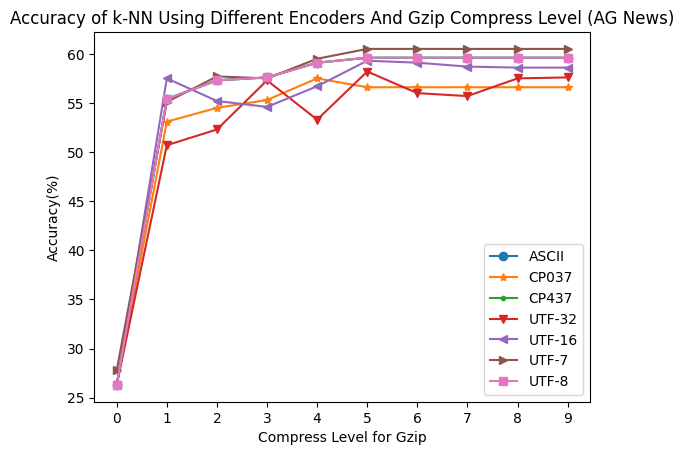

In [ ]:
# Data
x = np.linspace(0, 9, 10)

ascii_accuracy_info_np = np.array(ascii_accuracy_info) * 100
cp037_accuracy_info_np = np.array(cp037_accuracy_info) * 100
cp437_accuracy_info_np = np.array(cp437_accuracy_info) * 100
utf_32_accuracy_info_np = np.array(utf_32_accuracy_info) * 100
utf_16_accuracy_info_np = np.array(utf_16_accuracy_info) * 100
utf_7_accuracy_info_np = np.array(utf_7_accuracy_info) * 100
utf_8_accuracy_info_np = np.array(utf_8_accuracy_info) * 100

# Line chart
fig, ax = plt.subplots()
ax.plot(x, ascii_accuracy_info_np, marker = "o", label = "ASCII")
ax.plot(x, cp037_accuracy_info_np, marker = "*", label = "CP037")
ax.plot(x, cp437_accuracy_info_np, marker = ".", label = "CP437")
ax.plot(x, utf_32_accuracy_info_np, marker = "v", label = "UTF-32")
ax.plot(x, utf_16_accuracy_info_np, marker = "<", label = "UTF-16")
ax.plot(x, utf_7_accuracy_info_np, marker = ">", label = "UTF-7")
ax.plot(x, utf_8_accuracy_info_np, marker = "s", label = "UTF-8")
ax.legend()

plt.xlabel('Compress Level for Gzip')
plt.ylabel('Accuracy(%)')
plt.title('Accuracy of k-NN Using Different Encoders And Gzip Compress Level (AG News)')

plt.xticks(x)

plt.show()

### Sogou News

In [ ]:
# Update as Needed
dataset_name = 'Sogou News'
training_set = None
test_set = None

k = 20
num_training_dps_per_class = 100
num_test_dps = 1000

In [ ]:
if dataset_name == 'AG News':
    full_training_set = agnews_dataset['train']
    training_dps_list = []
    for label in set(full_training_set['label']):
        df_agnews_training = full_training_set.to_pandas()
        df_agnews_training = df_agnews_training[df_agnews_training['label'] == label]
        training_dps_list.append(df_agnews_training.sample(n=num_training_dps_per_class))
    training_set_df = pd.concat(training_dps_list)
    training_set = training_set_df.to_dict('records')

    full_test_set = agnews_dataset['test']
    df_agnews_test = full_test_set.to_pandas()
    test_set = (df_agnews_test.sample(n=num_test_dps)).to_dict('records')
elif dataset_name == 'Sogou News':
    full_training_set = sogou_news_dataset['train']
    training_dps_list = []
    for label in set(full_training_set['label']):
        df_agnews_training = full_training_set.to_pandas()
        df_agnews_training = df_agnews_training[df_agnews_training['label'] == label]
        training_dps_list.append(df_agnews_training.sample(n=num_training_dps_per_class))
    training_set_df = pd.concat(training_dps_list)
    training_set = training_set_df.to_dict('records')

    full_test_set = sogou_news_dataset['test']
    df_agnews_test = full_test_set.to_pandas()
    test_set = (df_agnews_test.sample(n=num_test_dps)).to_dict('records')

In [ ]:
def evaluate_gzip(encoding_method, compression_level):
    correct_count = 0
    total_count = 0
    for test_dp in test_set:
        x1, y1 = test_dp['content'], test_dp['label']
        Cx1 = len(gzip.compress(x1.encode(encoding_method, errors='ignore'), compresslevel=compression_level))
        distance_from_x1 = []
        for train_dp in training_set:
            x2 = train_dp['content']
            Cx2 = len(gzip.compress(x2.encode(encoding_method, errors='ignore'), compresslevel=compression_level))
            x1x2 = " ".join([x1, x2])
            Cx1x2 = len(gzip.compress(x1x2.encode(encoding_method, errors='ignore'), compresslevel=compression_level))
            ncd = (Cx1x2 - min(Cx1,Cx2)) / max(Cx1, Cx2)
            distance_from_x1.append(ncd)
        sorted_idx = np.argsort(np.array(distance_from_x1))
        top_k_class = [dp['label'] for dp in np.array(training_set)[sorted_idx[:k]]]
        predict_class = max(set(top_k_class) , key=top_k_class.count)
        if y1 == predict_class:
            correct_count += 1
        total_count += 1
    print('Encoding Method: ', encoding_method, ', Compression Level: ', compression_level, ', Total Count: ', total_count, ', Correct Count:', correct_count, ', Accuracy: ', correct_count / total_count)
    return correct_count / total_count

In [ ]:
# https://docs.python.org/3/library/codecs.html#standard-encodings
encoding_methods = ['ascii', 'cp037', 'cp437', 'utf_32', 'utf_16', 'utf_7', 'utf_8']
compression_levels = list(range(10))

In [ ]:
encoding_compression_accuracy_dict = dict()

Estimated time: 6 hrs.

In [ ]:
for encoding_method in encoding_methods:
    for compression_level in compression_levels:
        encoding_compression_accuracy_dict[(encoding_method, compression_level)] = evaluate_gzip(encoding_method, compression_level)

Encoding Method:  ascii , Compression Level:  0 , Total Count:  1000 , Correct Count: 222 , Accuracy:  0.222
Encoding Method:  ascii , Compression Level:  1 , Total Count:  1000 , Correct Count: 655 , Accuracy:  0.655
Encoding Method:  ascii , Compression Level:  2 , Total Count:  1000 , Correct Count: 651 , Accuracy:  0.651
Encoding Method:  ascii , Compression Level:  3 , Total Count:  1000 , Correct Count: 656 , Accuracy:  0.656
Encoding Method:  ascii , Compression Level:  4 , Total Count:  1000 , Correct Count: 677 , Accuracy:  0.677
Encoding Method:  ascii , Compression Level:  5 , Total Count:  1000 , Correct Count: 679 , Accuracy:  0.679
Encoding Method:  ascii , Compression Level:  6 , Total Count:  1000 , Correct Count: 683 , Accuracy:  0.683
Encoding Method:  ascii , Compression Level:  7 , Total Count:  1000 , Correct Count: 683 , Accuracy:  0.683
Encoding Method:  ascii , Compression Level:  8 , Total Count:  1000 , Correct Count: 686 , Accuracy:  0.686
Encoding Method:  a

In [ ]:
for encoding_method in encoding_methods[3:4]:
    for compression_level in compression_levels:
        encoding_compression_accuracy_dict[(encoding_method, compression_level)] = evaluate_gzip(encoding_method, compression_level)

Encoding Method:  utf_32 , Compression Level:  0 , Total Count:  1000 , Correct Count: 239 , Accuracy:  0.239
Encoding Method:  utf_32 , Compression Level:  1 , Total Count:  1000 , Correct Count: 511 , Accuracy:  0.511
Encoding Method:  utf_32 , Compression Level:  2 , Total Count:  1000 , Correct Count: 572 , Accuracy:  0.572
Encoding Method:  utf_32 , Compression Level:  3 , Total Count:  1000 , Correct Count: 669 , Accuracy:  0.669
Encoding Method:  utf_32 , Compression Level:  4 , Total Count:  1000 , Correct Count: 624 , Accuracy:  0.624
Encoding Method:  utf_32 , Compression Level:  5 , Total Count:  1000 , Correct Count: 663 , Accuracy:  0.663
Encoding Method:  utf_32 , Compression Level:  6 , Total Count:  1000 , Correct Count: 698 , Accuracy:  0.698
Encoding Method:  utf_32 , Compression Level:  7 , Total Count:  1000 , Correct Count: 683 , Accuracy:  0.683


In [ ]:
for encoding_method in encoding_methods[4:]:
    for compression_level in compression_levels:
        encoding_compression_accuracy_dict[(encoding_method, compression_level)] = evaluate_gzip(encoding_method, compression_level)

In [ ]:
encoding_compression_accuracy_dict

{('ascii', 0): 0.222,
 ('ascii', 1): 0.655,
 ('ascii', 2): 0.651,
 ('ascii', 3): 0.656,
 ('ascii', 4): 0.677,
 ('ascii', 5): 0.679,
 ('ascii', 6): 0.683,
 ('ascii', 7): 0.683,
 ('ascii', 8): 0.686,
 ('ascii', 9): 0.686,
 ('cp037', 0): 0.222,
 ('cp037', 1): 0.64,
 ('cp037', 2): 0.652,
 ('cp037', 3): 0.65,
 ('cp037', 4): 0.68,
 ('cp037', 5): 0.678,
 ('cp037', 6): 0.68,
 ('cp037', 7): 0.68,
 ('cp037', 8): 0.682,
 ('cp037', 9): 0.682,
 ('cp437', 0): 0.222,
 ('cp437', 1): 0.656,
 ('cp437', 2): 0.656,
 ('cp437', 3): 0.661,
 ('cp437', 4): 0.677,
 ('cp437', 5): 0.683,
 ('cp437', 6): 0.68,
 ('cp437', 7): 0.683,
 ('cp437', 8): 0.688,
 ('cp437', 9): 0.688,
 ('utf_32', 0): 0.226,
 ('utf_32', 1): 0.534,
 ('utf_32', 2): 0.536,
 ('utf_32', 3): 0.652,
 ('utf_32', 4): 0.593,
 ('utf_32', 5): 0.644,
 ('utf_32', 6): 0.673,
 ('utf_32', 7): 0.67,
 ('utf_32', 8): 0.665,
 ('utf_32', 9): 0.683,
 ('utf_16', 0): 0.222,
 ('utf_16', 1): 0.596,
 ('utf_16', 2): 0.657,
 ('utf_16', 3): 0.649,
 ('utf_16', 4): 0.659,
 (

In [ ]:
encoding_methods = ['ascii', 'cp037', 'cp437', 'utf_32', 'utf_16', 'utf_7', 'utf_8']
for encoding_method in encoding_methods:
    curr_encoding_method_info = []
    for (curr_encode_method, compress_level), accuracy in encoding_compression_accuracy_dict.items():
        if encoding_method == curr_encode_method:
            curr_encoding_method_info.append((compress_level, accuracy))
    curr_encoding_method_info.sort()
    print('The accuracy information for encoding method: ', encoding_method, ' is (compression level 0 - 9): ', [accuracy for level, accuracy in curr_encoding_method_info])

The accuracy information for encoding method:  ascii  is (compression level 0 - 9):  [0.222, 0.655, 0.651, 0.656, 0.677, 0.679, 0.683, 0.683, 0.686, 0.686]
The accuracy information for encoding method:  cp037  is (compression level 0 - 9):  [0.222, 0.64, 0.652, 0.65, 0.68, 0.678, 0.68, 0.68, 0.682, 0.682]
The accuracy information for encoding method:  cp437  is (compression level 0 - 9):  [0.222, 0.656, 0.656, 0.661, 0.677, 0.683, 0.68, 0.683, 0.688, 0.688]
The accuracy information for encoding method:  utf_32  is (compression level 0 - 9):  [0.226, 0.534, 0.536, 0.652, 0.593, 0.644, 0.673, 0.67, 0.665, 0.683]
The accuracy information for encoding method:  utf_16  is (compression level 0 - 9):  [0.222, 0.596, 0.657, 0.649, 0.659, 0.679, 0.677, 0.666, 0.67, 0.669]
The accuracy information for encoding method:  utf_7  is (compression level 0 - 9):  [0.225, 0.637, 0.653, 0.657, 0.67, 0.674, 0.668, 0.663, 0.663, 0.663]
The accuracy information for encoding method:  utf_8  is (compression l

In [ ]:
ascii_accuracy_info = [0.222, 0.655, 0.651, 0.656, 0.677, 0.679, 0.683, 0.683, 0.686, 0.686]
cp037_accuracy_info = [0.222, 0.64, 0.652, 0.65, 0.68, 0.678, 0.68, 0.68, 0.682, 0.682]
cp437_accuracy_info = [0.222, 0.656, 0.656, 0.661, 0.677, 0.683, 0.68, 0.683, 0.688, 0.688]
utf_32_accuracy_info = [0.226, 0.534, 0.536, 0.652, 0.593, 0.644, 0.673, 0.67, 0.665, 0.683]
utf_16_accuracy_info = [0.222, 0.596, 0.657, 0.649, 0.659, 0.679, 0.677, 0.666, 0.67, 0.669]
utf_7_accuracy_info = [0.225, 0.637, 0.653, 0.657, 0.67, 0.674, 0.668, 0.663, 0.663, 0.663]
utf_8_accuracy_info = [0.222, 0.654, 0.658, 0.657, 0.677, 0.682, 0.68, 0.679, 0.681, 0.681]

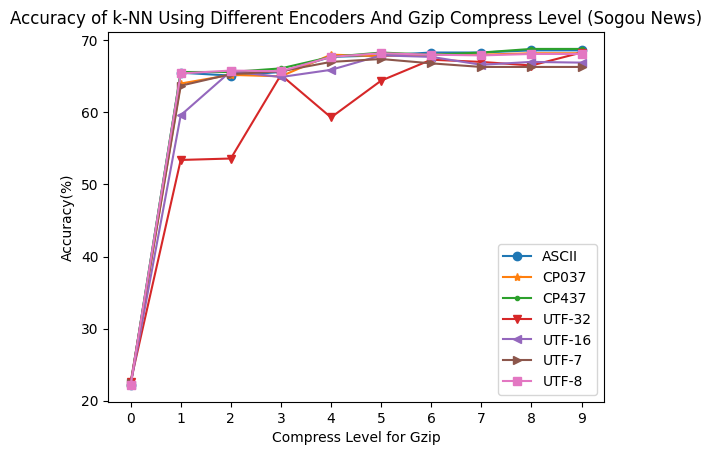

In [ ]:
# Data
x = np.linspace(0, 9, 10)

ascii_accuracy_info_np = np.array(ascii_accuracy_info) * 100
cp037_accuracy_info_np = np.array(cp037_accuracy_info) * 100
cp437_accuracy_info_np = np.array(cp437_accuracy_info) * 100
utf_32_accuracy_info_np = np.array(utf_32_accuracy_info) * 100
utf_16_accuracy_info_np = np.array(utf_16_accuracy_info) * 100
utf_7_accuracy_info_np = np.array(utf_7_accuracy_info) * 100
utf_8_accuracy_info_np = np.array(utf_8_accuracy_info) * 100

# Line chart
fig, ax = plt.subplots()
ax.plot(x, ascii_accuracy_info_np, marker = "o", label = "ASCII")
ax.plot(x, cp037_accuracy_info_np, marker = "*", label = "CP037")
ax.plot(x, cp437_accuracy_info_np, marker = ".", label = "CP437")
ax.plot(x, utf_32_accuracy_info_np, marker = "v", label = "UTF-32")
ax.plot(x, utf_16_accuracy_info_np, marker = "<", label = "UTF-16")
ax.plot(x, utf_7_accuracy_info_np, marker = ">", label = "UTF-7")
ax.plot(x, utf_8_accuracy_info_np, marker = "s", label = "UTF-8")
ax.legend()

plt.xlabel('Compress Level for Gzip')
plt.ylabel('Accuracy(%)')
plt.title('Accuracy of k-NN Using Different Encoders And Gzip Compress Level (Sogou News)')

plt.xticks(x)

plt.show()

## Hyperparameter (k-NN) - k-Value

**We are using 100 per class training data points, and evaluate on 1000 testing data points.**

**The evaluation metrics is the accuracy rate.**

In [ ]:
# Update as Needed
dataset_name = 'AG News'
training_set = None
test_set = None

num_training_dps_per_class = 100
num_test_dps = 1000
encoding_method = 'utf_7'
compression_level = 9

In [ ]:
if dataset_name == 'AG News':
    full_training_set = agnews_dataset['train']
    training_dps_list = []
    for label in set(full_training_set['label']):
        df_agnews_training = full_training_set.to_pandas()
        df_agnews_training = df_agnews_training[df_agnews_training['label'] == label]
        training_dps_list.append(df_agnews_training.sample(n=num_training_dps_per_class))
    training_set_df = pd.concat(training_dps_list)
    training_set = training_set_df.to_dict('records')

    full_test_set = agnews_dataset['test']
    df_agnews_test = full_test_set.to_pandas()
    test_set = (df_agnews_test.sample(n=num_test_dps)).to_dict('records')
elif dataset_name == 'Sogou News':
    full_training_set = sogou_news_dataset['train']
    training_dps_list = []
    for label in set(full_training_set['label']):
        df_agnews_training = full_training_set.to_pandas()
        df_agnews_training = df_agnews_training[df_agnews_training['label'] == label]
        training_dps_list.append(df_agnews_training.sample(n=num_training_dps_per_class))
    training_set_df = pd.concat(training_dps_list)
    training_set = training_set_df.to_dict('records')

    full_test_set = sogou_news_dataset['test']
    df_agnews_test = full_test_set.to_pandas()
    test_set = (df_agnews_test.sample(n=num_test_dps)).to_dict('records')

In [ ]:
k_values = [1, 5, 10, 15, 20, 25, 30]

### AG News

In [ ]:
def evaluate_gzip(encoding_method, compression_level, k):
    correct_count = 0
    total_count = 0
    for test_dp in test_set:
        x1, y1 = test_dp['text'], test_dp['label']
        Cx1 = len(gzip.compress(x1.encode(encoding_method), compresslevel=compression_level))
        distance_from_x1 = []
        for train_dp in training_set:
            x2 = train_dp['text']
            Cx2 = len(gzip.compress(x2.encode(encoding_method), compresslevel=compression_level))
            x1x2 = " ".join([x1, x2])
            Cx1x2 = len(gzip.compress(x1x2.encode(encoding_method), compresslevel=compression_level))
            ncd = (Cx1x2 - min(Cx1,Cx2)) / max(Cx1, Cx2)
            distance_from_x1.append(ncd)
        sorted_idx = np.argsort(np.array(distance_from_x1))
        top_k_class = [dp['label'] for dp in np.array(training_set)[sorted_idx[:k]]]
        predict_class = max(set(top_k_class) , key=top_k_class.count)
        if y1 == predict_class:
            correct_count += 1
        total_count += 1
    print('Encoding Method: ', encoding_method, ', Compression Level: ', compression_level, ', k value: ', k, ', Total Count: ', total_count, ', Correct Count:', correct_count, ', Accuracy: ', correct_count / total_count)
    return correct_count / total_count

In [ ]:
k_knn_accuracy_list = []
for k in k_values:
    k_knn_accuracy_list.append(evaluate_gzip(encoding_method, compression_level, k))

Encoding Method:  utf_7 , Compression Level:  9 , k value:  1 , Total Count:  1000 , Correct Count: 561 , Accuracy:  0.561
Encoding Method:  utf_7 , Compression Level:  9 , k value:  5 , Total Count:  1000 , Correct Count: 530 , Accuracy:  0.53
Encoding Method:  utf_7 , Compression Level:  9 , k value:  10 , Total Count:  1000 , Correct Count: 554 , Accuracy:  0.554
Encoding Method:  utf_7 , Compression Level:  9 , k value:  15 , Total Count:  1000 , Correct Count: 557 , Accuracy:  0.557
Encoding Method:  utf_7 , Compression Level:  9 , k value:  20 , Total Count:  1000 , Correct Count: 555 , Accuracy:  0.555
Encoding Method:  utf_7 , Compression Level:  9 , k value:  25 , Total Count:  1000 , Correct Count: 548 , Accuracy:  0.548
Encoding Method:  utf_7 , Compression Level:  9 , k value:  30 , Total Count:  1000 , Correct Count: 553 , Accuracy:  0.553


In [ ]:
k_knn_accuracy_list

[0.561, 0.53, 0.554, 0.557, 0.555, 0.548, 0.553]

<ipython-input-16-f3daf90530d1>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels)


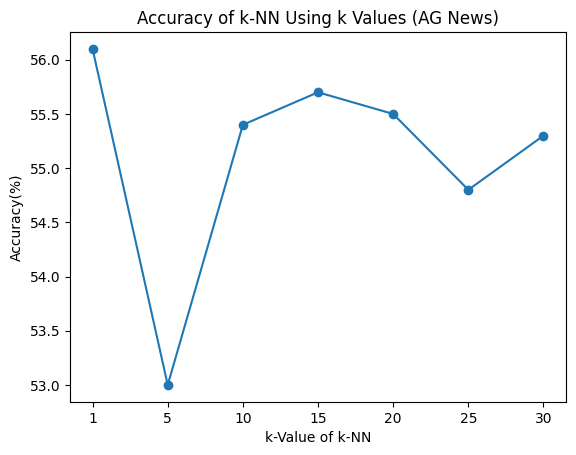

In [ ]:
# Data
x = np.linspace(0, len(k_values) - 1, len(k_values))

k_knn_accuracy_list_np = np.array(k_knn_accuracy_list) * 100

# Line chart
fig, ax = plt.subplots()
ax.plot(x, k_knn_accuracy_list_np, marker = "o")

plt.xlabel('k-Value of k-NN')
plt.ylabel('Accuracy(%)')
plt.title('Accuracy of k-NN Using k Values (AG News)')

x_labels = [None] + k_values

ax.set_xticklabels(x_labels)

plt.show()

### Sogou News

In [ ]:
# Update as Needed
dataset_name = 'Sogou News'
training_set = None
test_set = None

num_training_dps_per_class = 100
num_test_dps = 1000
encoding_method = 'utf_7'
compression_level = 9

In [ ]:
if dataset_name == 'AG News':
    full_training_set = agnews_dataset['train']
    training_dps_list = []
    for label in set(full_training_set['label']):
        df_agnews_training = full_training_set.to_pandas()
        df_agnews_training = df_agnews_training[df_agnews_training['label'] == label]
        training_dps_list.append(df_agnews_training.sample(n=num_training_dps_per_class))
    training_set_df = pd.concat(training_dps_list)
    training_set = training_set_df.to_dict('records')

    full_test_set = agnews_dataset['test']
    df_agnews_test = full_test_set.to_pandas()
    test_set = (df_agnews_test.sample(n=num_test_dps)).to_dict('records')
elif dataset_name == 'Sogou News':
    full_training_set = sogou_news_dataset['train']
    training_dps_list = []
    for label in set(full_training_set['label']):
        df_agnews_training = full_training_set.to_pandas()
        df_agnews_training = df_agnews_training[df_agnews_training['label'] == label]
        training_dps_list.append(df_agnews_training.sample(n=num_training_dps_per_class))
    training_set_df = pd.concat(training_dps_list)
    training_set = training_set_df.to_dict('records')

    full_test_set = sogou_news_dataset['test']
    df_agnews_test = full_test_set.to_pandas()
    test_set = (df_agnews_test.sample(n=num_test_dps)).to_dict('records')

In [ ]:
def evaluate_gzip(encoding_method, compression_level, k):
    correct_count = 0
    total_count = 0
    for test_dp in test_set:
        x1, y1 = test_dp['content'], test_dp['label']
        Cx1 = len(gzip.compress(x1.encode(encoding_method), compresslevel=compression_level))
        distance_from_x1 = []
        for train_dp in training_set:
            x2 = train_dp['content']
            Cx2 = len(gzip.compress(x2.encode(encoding_method), compresslevel=compression_level))
            x1x2 = " ".join([x1, x2])
            Cx1x2 = len(gzip.compress(x1x2.encode(encoding_method), compresslevel=compression_level))
            ncd = (Cx1x2 - min(Cx1,Cx2)) / max(Cx1, Cx2)
            distance_from_x1.append(ncd)
        sorted_idx = np.argsort(np.array(distance_from_x1))
        top_k_class = [dp['label'] for dp in np.array(training_set)[sorted_idx[:k]]]
        predict_class = max(set(top_k_class) , key=top_k_class.count)
        if y1 == predict_class:
            correct_count += 1
        total_count += 1
    print('Encoding Method: ', encoding_method, ', Compression Level: ', compression_level, ', k value: ', k, ', Total Count: ', total_count, ', Correct Count:', correct_count, ', Accuracy: ', correct_count / total_count)
    return correct_count / total_count

In [ ]:
k_knn_accuracy_list = []
for k in k_values:
    k_knn_accuracy_list.append(evaluate_gzip(encoding_method, compression_level, k))

Encoding Method:  utf_7 , Compression Level:  9 , k value:  1 , Total Count:  1000 , Correct Count: 758 , Accuracy:  0.758
Encoding Method:  utf_7 , Compression Level:  9 , k value:  5 , Total Count:  1000 , Correct Count: 729 , Accuracy:  0.729
Encoding Method:  utf_7 , Compression Level:  9 , k value:  10 , Total Count:  1000 , Correct Count: 703 , Accuracy:  0.703
Encoding Method:  utf_7 , Compression Level:  9 , k value:  15 , Total Count:  1000 , Correct Count: 691 , Accuracy:  0.691
Encoding Method:  utf_7 , Compression Level:  9 , k value:  20 , Total Count:  1000 , Correct Count: 678 , Accuracy:  0.678
Encoding Method:  utf_7 , Compression Level:  9 , k value:  25 , Total Count:  1000 , Correct Count: 667 , Accuracy:  0.667
Encoding Method:  utf_7 , Compression Level:  9 , k value:  30 , Total Count:  1000 , Correct Count: 651 , Accuracy:  0.651


In [ ]:
k_knn_accuracy_list

[0.758, 0.729, 0.703, 0.691, 0.678, 0.667, 0.651]

<ipython-input-23-291eb3c4b18b>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels)


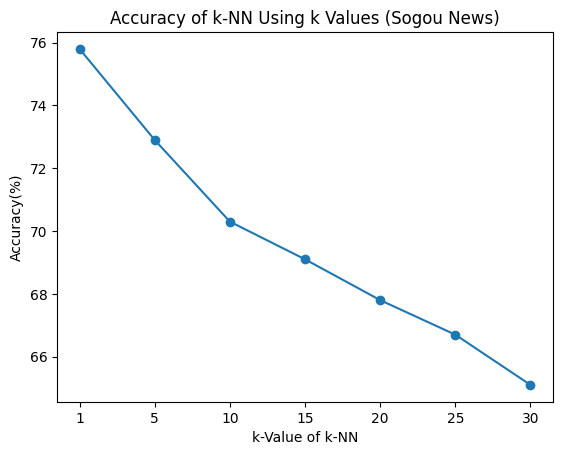

In [ ]:
# Data
x = np.linspace(0, len(k_values) - 1, len(k_values))

k_knn_accuracy_list_np = np.array(k_knn_accuracy_list) * 100

# Line chart
fig, ax = plt.subplots()
ax.plot(x, k_knn_accuracy_list_np, marker = "o")

plt.xlabel('k-Value of k-NN')
plt.ylabel('Accuracy(%)')
plt.title('Accuracy of k-NN Using k Values (Sogou News)')

x_labels = [None] + k_values

ax.set_xticklabels(x_labels)

plt.show()

#Gzip Pre-processing for DNN

In [8]:
# Update as Needed
dataset_name = 'AG News'
training_set = None
test_set = None

num_training_dps_per_class = 100
num_test_dps = 1000

In [9]:
if dataset_name == 'AG News':
    full_training_set = agnews_dataset['train']
    training_dps_list = []
    for label in set(full_training_set['label']):
        df_agnews_training = full_training_set.to_pandas()
        df_agnews_training = df_agnews_training[df_agnews_training['label'] == label]
        training_dps_list.append(df_agnews_training.sample(n=num_training_dps_per_class))
    training_set_df = pd.concat(training_dps_list)
    training_set = training_set_df.to_dict('records')

    full_test_set = agnews_dataset['test']
    df_agnews_test = full_test_set.to_pandas()
    test_set = (df_agnews_test.sample(n=num_test_dps)).to_dict('records')

In [18]:
processed_training_set = []
processed_test_set = []
for training_data in training_set:
    compressed_training_data_length = len(gzip.compress(training_data['text'].encode('UTF-7'), compresslevel=9))
    new_training_data = {'text': training_data['text'] + ' Gzip compressed length: ' + str(compressed_training_data_length), 'label': training_data['label']}
    processed_training_set.append(new_training_data)

for test_data in test_set:
    compressed_test_data_length = len(gzip.compress(test_data['text'].encode('UTF-7'), compresslevel=9))
    new_test_data = {'text': test_data['text'] + ' Gzip compressed length: ' + str(compressed_test_data_length), 'label': test_data['label']}
    processed_test_set.append(new_test_data)

processed_test_set

[{'text': 'Bluetooth Group Outlines Strategy (NewsFactor) NewsFactor - With Bluetooth short-range wireless technology finding its way into an array of hardware products, ranging from mobile phones to in-vehicle telematics systems, a working group promoting the specification has outlined a strategy to make it even more attractive and useful. Gzip compressed length: 231',
  'label': 3},
 {'text': 'Trump defends Martha Stewart New York real estate mogul Donald Trump defended his friend Martha Stewart as the woman who turned home economics into a media empire began her prison term. Gzip compressed length: 141',
  'label': 2},
 {'text': "Fortune's 100 Most Doomed? Your company made it to Fortune's 100 Fastest Growing Companies list. Is that a good thing? Gzip compressed length: 116",
  'label': 2},
 {'text': 'IBM #39;s High-End Power5 Servers Catch HP IBM on Friday introduced high-end servers in its pSeries and iSeries lines that include virtualization features and raw power that some exper